In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [151]:
train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [152]:
test=pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [153]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [154]:
train.isnull().sum()
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [155]:
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [156]:
train = train.head(n = 20000)
train.is_fraud.value_counts()


is_fraud
0    19850
1      150
Name: count, dtype: int64

In [157]:
test = test.head(n = 5000)

In [158]:
#test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
#train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

#test['date_as_float'] = test['trans_date_trans_time'].apply(lambda x: x.timestamp())
#train['date_as_float'] = test['trans_date_trans_time'].apply(lambda x: x.timestamp())



# EDA


In [159]:
train[train["is_fraud"] == 1]["job"].value_counts()

job
Administrator, education     15
Financial trader             14
Geochemist                   13
Public affairs consultant    12
Psychotherapist, child       11
Medical technical officer    11
Event organiser              11
Engineer, automotive         11
Scientist, biomedical         9
Soil scientist                8
Horticultural consultant      7
Solicitor, Scotland           7
Cytogeneticist                5
Glass blower/designer         5
Retail merchandiser           5
Financial adviser             4
Surveyor, land/geomatics      2
Name: count, dtype: int64

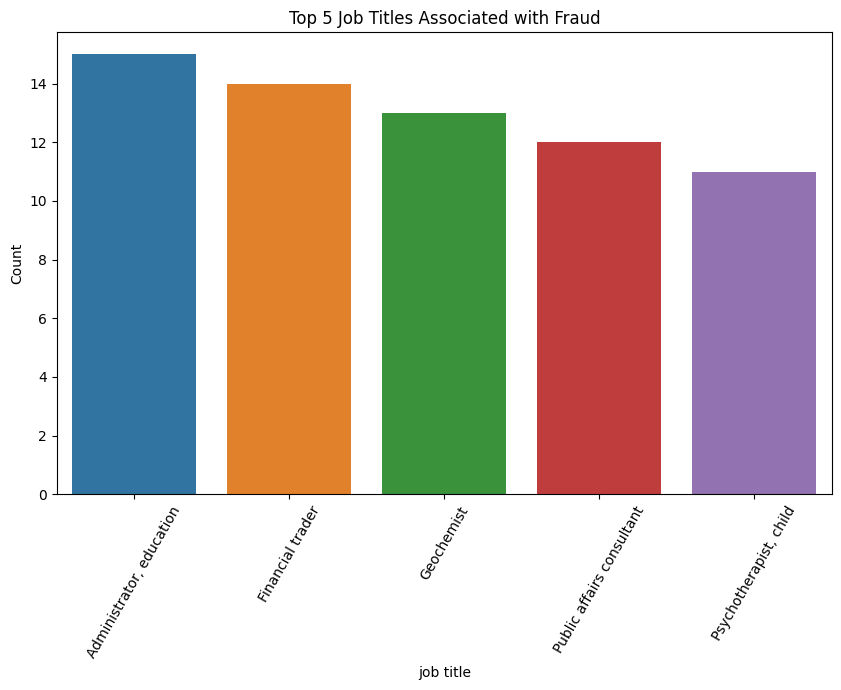

In [160]:
# Extract top 5 job titles associated with fraud and their counts
fraud_job_title = train[train["is_fraud"] == 1]["job"].value_counts().head()

# make a dataframe
fraud_job_title_df = fraud_job_title.reset_index()
fraud_job_title_df.columns = ['job', 'count']

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_job_title_df, x="job", y="count",dodge=True)
plt.title('Top 5 Job Titles Associated with Fraud')
plt.xlabel('job title')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [161]:
train[train["is_fraud"] == 1]["category"].value_counts()

category
grocery_pos       46
shopping_net      33
misc_net          20
gas_transport     16
shopping_pos      15
health_fitness     4
travel             3
misc_pos           3
kids_pets          3
food_dining        3
entertainment      2
grocery_net        1
home               1
Name: count, dtype: int64

In [162]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

/tmp/ipykernel_334/2558149820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
/tmp/ipykernel_334/2558149820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
/tmp/ipykernel_334/2558149820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [163]:
#FEATURE ENGINEERING
#Calculate Age
train["age"] = (train["trans_date"] - train["dob"]).dt.days // 365
test["age"] = (test["trans_date"] - test["dob"]).dt.days // 365



/tmp/ipykernel_334/1161317635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["age"] = (train["trans_date"] - train["dob"]).dt.days // 365
/tmp/ipykernel_334/1161317635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["age"] = (test["trans_date"] - test["dob"]).dt.days // 365


In [164]:
train.drop(columns = ["Unnamed: 0",'first','last','street','city','zip','trans_num','trans_date_trans_time','dob','unix_time','trans_date'],inplace = True)

train.columns

test.drop(columns = ["Unnamed: 0",'first','last','street','city','zip','trans_num','trans_date_trans_time','dob','unix_time','trans_date'],inplace = True)


/tmp/ipykernel_334/3733331587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = ["Unnamed: 0",'first','last','street','city','zip','trans_num','trans_date_trans_time','dob','unix_time','trans_date'],inplace = True)
/tmp/ipykernel_334/3733331587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = ["Unnamed: 0",'first','last','street','city','zip','trans_num','trans_date_trans_time','dob','unix_time','trans_date'],inplace = True)


In [165]:
#train = pd.get_dummies(data=train)
#train
#test=pd.get_dummies(data=train)

In [166]:
#selected_columns=['trans_date_trans_time','merchant','category','amt','gender','street','state','city_pop','job','dob','trans_num','unix_time','merch_lat','merch_long','is_fraud']

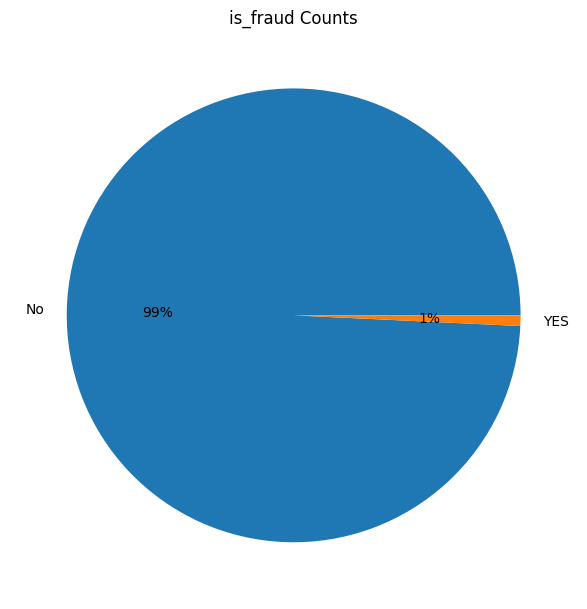

In [167]:
exit_counts = train["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [168]:
# Convert categorical column gender into numerical 
train.gender=train.gender.apply(lambda x: 1 if x=="M" else 0)
test.gender=test.gender.apply(lambda x: 1 if x=="M" else 0)

/tmp/ipykernel_334/1690119653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.gender=train.gender.apply(lambda x: 1 if x=="M" else 0)
/tmp/ipykernel_334/1690119653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.gender=test.gender.apply(lambda x: 1 if x=="M" else 0)


In [169]:
#One Hot Encoding of Category column
train = pd.get_dummies(train, columns=['category'], prefix='category')
test = pd.get_dummies(test, columns=['category'], prefix='category')

test = test.reindex(columns=train.columns, fill_value=0)

In [170]:
train= pd.get_dummies(train, columns=['job'], prefix='job')
test= pd.get_dummies(test, columns=['job'], prefix='job')
test = test.reindex(columns=train.columns, fill_value=0)

In [171]:
train= pd.get_dummies(train, columns=['state'])
test= pd.get_dummies(test, columns=['state'])

In [172]:
train= pd.get_dummies(train, columns=['merchant'], prefix='merchant')
test= pd.get_dummies(test, columns=['merchant'], prefix='merchant')
test = test.reindex(columns=train.columns, fill_value=0)

In [173]:
#from sklearn.model_selection import train_test_split 

#from sklearn.metrics import accuracy_score 
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#train["merchant"] = encoder.fit_transform(train["merchant"])
#train["category"] = encoder.fit_transform(train["category"])
#train["gender"] = encoder.fit_transform(train["gender"])
#train["job"] = encoder.fit_transform(train["job"])
#train["state"] = encoder.fit_transform(train["state"])
#train["city_pop"] = encoder.fit_transform(train["city_pop"])


In [174]:
#selected_features=['merchant','category','gender','job','state','is_fraud']

In [175]:
train.head()

,cc_num,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,...,"merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,2703186189652095,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,30,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,40,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,56,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,52,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,32,...,False,False,False,False,False,False,False,False,False,False


In [176]:
test.head()

,cc_num,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,...,"merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,2291163933867244,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,0,52,...,False,False,False,False,False,False,False,False,False,False
1,3573030041201292,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,0,30,...,False,False,False,False,False,False,False,False,False,False
2,3598215285024754,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,0,49,...,False,False,False,False,False,False,False,False,False,False
3,3591919803438423,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,0,32,...,False,False,False,False,False,False,False,False,False,False
4,3526826139003047,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,0,65,...,False,False,False,False,False,False,False,False,False,False


In [177]:
train.dtypes

cc_num                                         int64
amt                                          float64
gender                                         int64
lat                                          float64
long                                         float64
                                              ...   
merchant_fraud_Zemlak Group                     bool
merchant_fraud_Zemlak, Tillman and Cremin       bool
merchant_fraud_Ziemann-Waters                   bool
merchant_fraud_Zieme, Bode and Dooley           bool
merchant_fraud_Zulauf LLC                       bool
Length: 1242, dtype: object

In [178]:
X_train = train.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [179]:
#Convert boolean columns to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})

# Verify the conversion
print(X_train.dtypes)



cc_num                                         int64
amt                                          float64
gender                                         int64
lat                                          float64
long                                         float64
                                              ...   
merchant_fraud_Zemlak Group                    int64
merchant_fraud_Zemlak, Tillman and Cremin      int64
merchant_fraud_Ziemann-Waters                  int64
merchant_fraud_Zieme, Bode and Dooley          int64
merchant_fraud_Zulauf LLC                      int64
Length: 1241, dtype: object


In [180]:
# Ensure all bool columns are converted to int
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})

# Check data types again
print(X_train.dtypes)


cc_num                                         int64
amt                                          float64
gender                                         int64
lat                                          float64
long                                         float64
                                              ...   
merchant_fraud_Zemlak Group                    int64
merchant_fraud_Zemlak, Tillman and Cremin      int64
merchant_fraud_Ziemann-Waters                  int64
merchant_fraud_Zieme, Bode and Dooley          int64
merchant_fraud_Zulauf LLC                      int64
Length: 1241, dtype: object


In [181]:
# Check data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtype)

cc_num                                         int64
amt                                          float64
gender                                         int64
lat                                          float64
long                                         float64
                                              ...   
merchant_fraud_Zemlak Group                    int64
merchant_fraud_Zemlak, Tillman and Cremin      int64
merchant_fraud_Ziemann-Waters                  int64
merchant_fraud_Zieme, Bode and Dooley          int64
merchant_fraud_Zulauf LLC                      int64
Length: 1241, dtype: object
int64


In [182]:
# Take a subset of the data
#X_train_subset = X_train.iloc[:, :10]  # Use only the first 10 columns for testing
#y_train_subset = y_train.iloc[:100]    # Use only the first 100 rows for testing

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(39700, 1241)
(39700,)


In [184]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4982
           1       0.00      0.00      0.00        18

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.99      1.00      0.99      5000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train the Model

In [185]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4982
           1       0.04      0.67      0.08        18

    accuracy                           0.95      5000
   macro avg       0.52      0.81      0.53      5000
weighted avg       1.00      0.95      0.97      5000

